In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import collections

In [2]:
DATASET_BASE_PATH = 'dataset'

In [3]:
bird_names = ['comcuc', 'cowpig1', 'eucdov', 'eueowl1', 'grswoo', 'tawowl1']

In [4]:
def load_feature_names():
    with open(os.path.join(DATASET_BASE_PATH, 'feature_names.txt')) as f:
        return f.read().split('\n')

In [5]:
def load_class_names():
    with open(os.path.join(DATASET_BASE_PATH, 'class_names.txt')) as f:
        return f.read().split('\n')

In [6]:
def load_annotations_for_file(bird: str, file_nr):
    data = np.load(os.path.join(DATASET_BASE_PATH, bird, f'{file_nr}.npy'))
    labels = np.load(os.path.join(DATASET_BASE_PATH, bird, f'{file_nr}.labels.npy'))
    return data, labels

In [7]:
def get_file_nrs_of_bird(bird: str):
    return [f.split('.')[0] for f in os.listdir(os.path.join(DATASET_BASE_PATH, bird))[::2]]

In [8]:
def load_annotations_for_bird(bird: str):
    file_nrs = get_file_nrs_of_bird(bird)
    data_arrays = []
    label_arrays = []
    for file_nr in file_nrs:
        data, labels = load_annotations_for_file(bird, file_nr)
        data_arrays.append(data)
        label_arrays.append(labels)
    return data_arrays, label_arrays

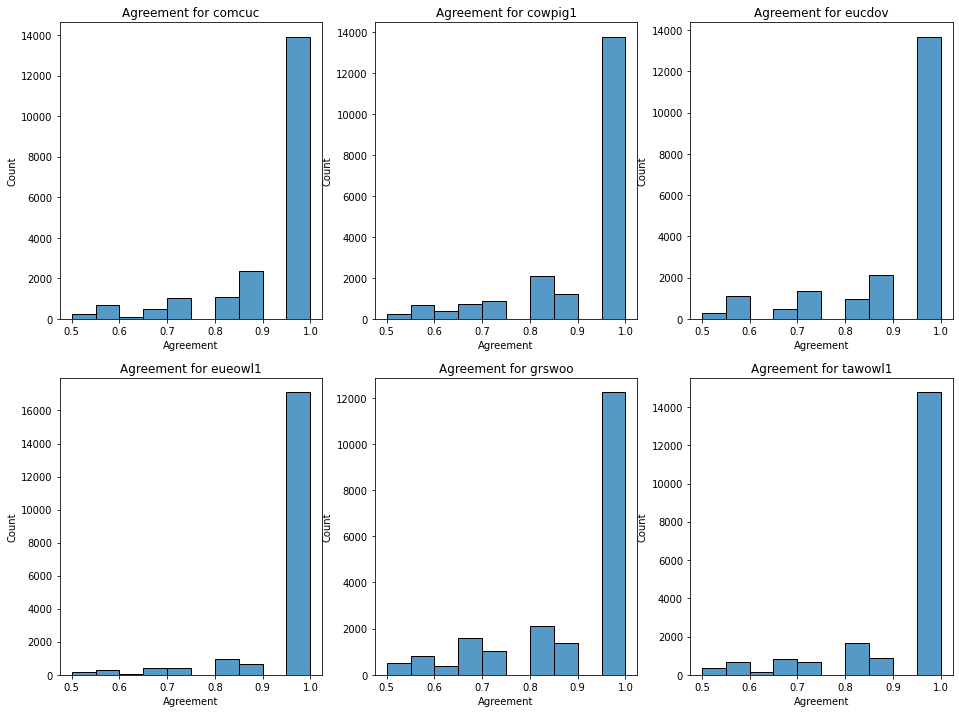

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(16, 12))

for i, bird_name in enumerate(bird_names):
    agreements = []
    for file_labels in load_annotations_for_bird(bird_name)[1]:
        for fragment_labels in file_labels:
            agreements.append(np.count_nonzero(fragment_labels[1:] == fragment_labels[0]) / (len(fragment_labels) - 1))
    
    ax = axs[i // 3, i % 3]
    sns.histplot(agreements, bins=10, ax=ax)
    ax.set(xlabel='Agreement', title=f'Agreement for {bird_name}')

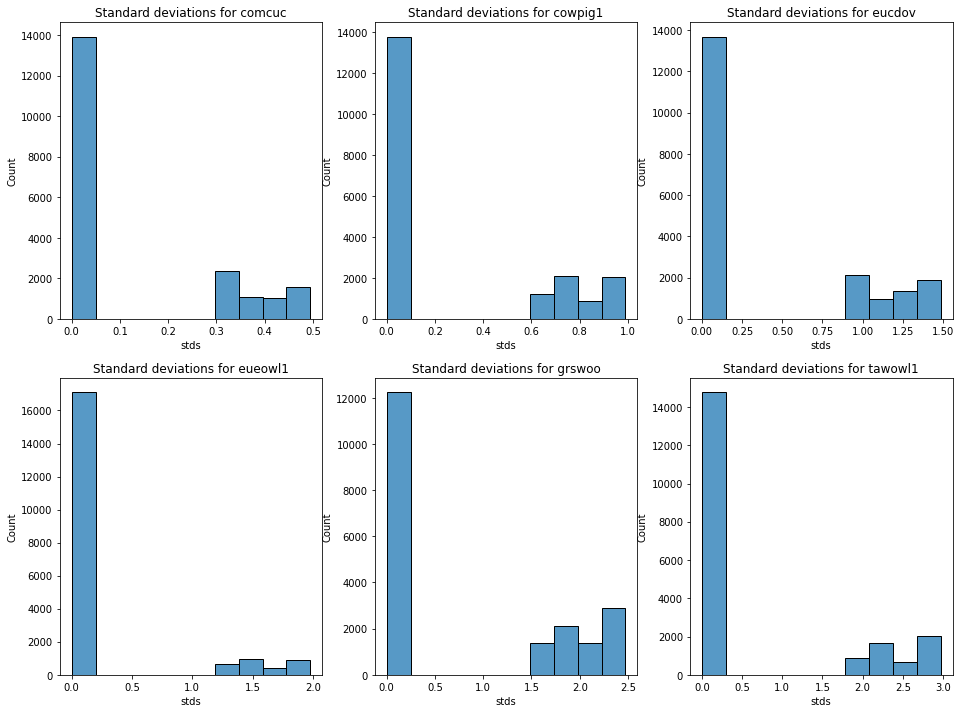

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(16, 12))

for i, bird_name in enumerate(bird_names):
    stds = []
    for file_labels in load_annotations_for_bird(bird_name)[1]:
        for fragment_labels in file_labels:
            stds.append(np.std(fragment_labels))
    
    ax = axs[i // 3, i % 3]
    sns.histplot(stds, bins=10, ax=ax)
    ax.set(xlabel='stds', title=f'Standard deviations for {bird_name}')

[Text(0.5, 0, 'Label (class)'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Occurences of labels')]

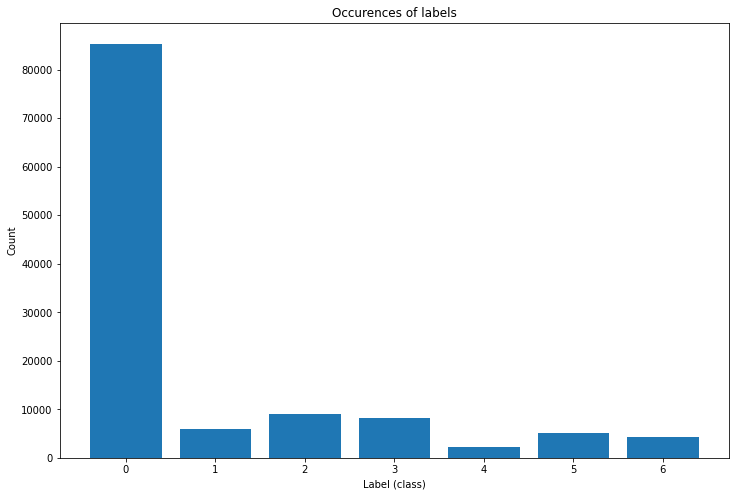

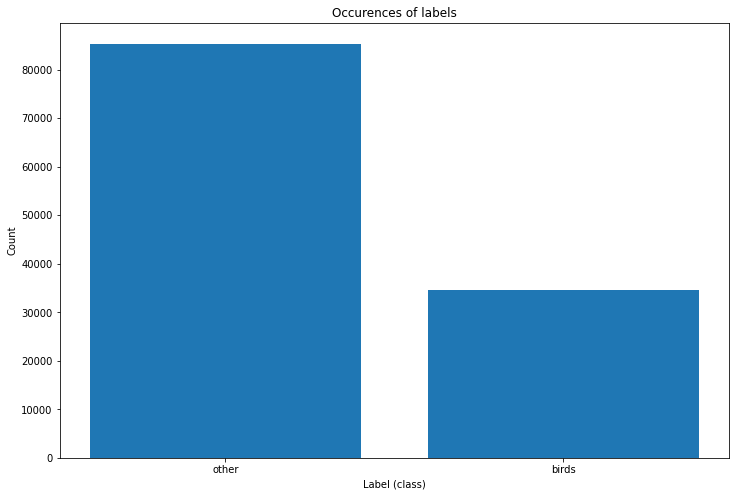

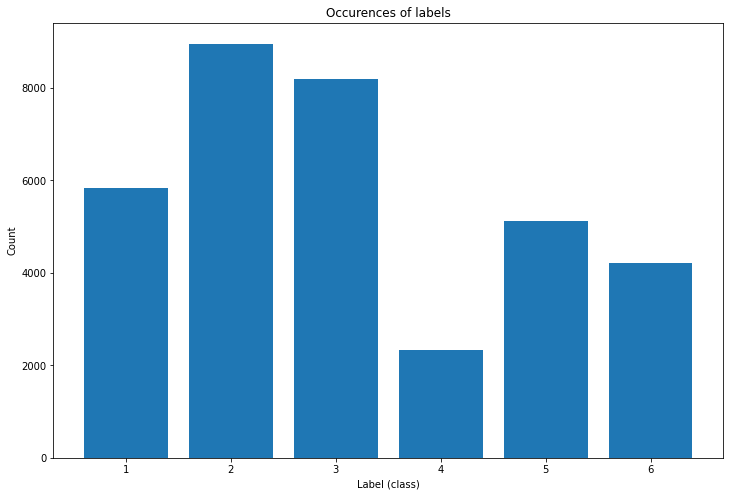

In [11]:
label_counts = collections.Counter([
    fragment_labels[0]
    for bird_name in bird_names
    for file_labels in load_annotations_for_bird(bird_name)[1]
    for fragment_labels in file_labels
])
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(label_counts.keys(), label_counts.values())
ax.set(xlabel='Label (class)', ylabel='Count', title='Occurences of labels')

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(['other', 'birds'], [list(label_counts.values())[0], sum(list(label_counts.values())[1:])])
ax.set(xlabel='Label (class)', ylabel='Count', title='Occurences of labels')

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(list(label_counts.keys())[1:], list(label_counts.values())[1:])
ax.set(xlabel='Label (class)', ylabel='Count', title='Occurences of labels')

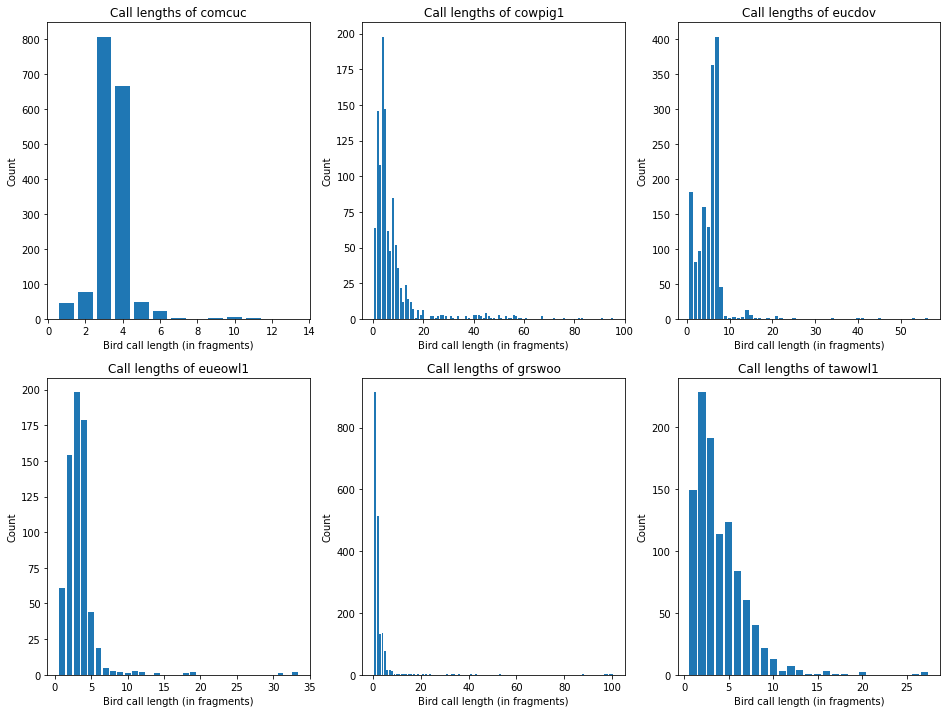

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(16, 12))

for i, bird_name in enumerate(bird_names):
    file_nrs = get_file_nrs_of_bird(bird_name)
    bird_call_lengths = []
    for file_nr in file_nrs:
        _, labels = load_annotations_for_file(bird_name, file_nr)
        file_labels = np.asarray([fragment_labels[0] for fragment_labels in labels])
        file_labels_bird_call = file_labels != 0
        # https://stackoverflow.com/a/24343375
        bird_call_lengths.extend(np.diff(np.where(np.concatenate(([file_labels_bird_call[0]],
                                     file_labels_bird_call[:-1] != file_labels_bird_call[1:],
                                     [True])))[0])[::2])
    
    bird_call_length_counts = collections.Counter(bird_call_lengths)
    ax = axs[i // 3, i % 3]
    ax.bar(bird_call_length_counts.keys(), bird_call_length_counts.values())
    ax.set(xlabel='Bird call length (in fragments)', ylabel='Count', title=f'Call lengths of {bird_name}')
    

[ 1.66782930e-01  7.94402882e-02  4.90957062e+02  4.91752991e+02
  4.88983582e+02  4.85077576e+02  4.69738678e+02  5.13687073e+02
  5.12657349e+02  2.45042892e+02  5.14488342e+02  2.45524414e+02
  4.68452850e+02  4.68855499e+02  4.67771393e+02  4.67353729e+02
  6.86301947e+00  7.40643644e+00  7.93649149e+00  8.11776829e+00
  8.58257198e+00  9.09781456e+00  1.04107637e+01  1.00188141e+01
  8.49316692e+00  7.91081333e+00  7.51972151e+00  7.57555056e+00
  7.47181368e+00  7.48307657e+00  7.29540300e+00  7.90006018e+00
  7.57555866e+00  7.27436733e+00  7.03663254e+00  6.87900543e+00
  6.82639456e+00  6.80445194e+00  6.96471643e+00  7.47812176e+00
  7.18414927e+00  6.98656130e+00  6.86810541e+00  6.70029688e+00
  6.97535086e+00  6.85850382e+00  7.06434870e+00  7.18788910e+00
  7.08326578e+00  7.37418032e+00  7.26335621e+00  7.05452728e+00
  7.04672623e+00  6.72683287e+00  6.72121954e+00  6.73598957e+00
  6.43326521e+00  6.31129789e+00  6.57974863e+00  7.57873678e+00
  8.48659992e+00  7.96124

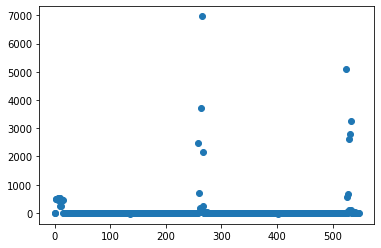

In [13]:
for i, bird_name in enumerate(bird_names):
    agreements = []
    for file_data in load_annotations_for_bird(bird_name)[0]:
        for fragment_data in file_data:
            print(fragment_data)
            plt.scatter(np.arange(0, fragment_data.shape[0]), fragment_data)
            break
        break
    break
    
    ax = axs[i // 3, i % 3]
    sns.histplot(agreements, bins=10, ax=ax)
    ax.set(xlabel='Agreement', title=f'Agreement for {bird_name}')

In [14]:
def load_bird_dataset() -> pd.DataFrame:
    # get classes and features from a corresponding file
    features = load_feature_names()[:-1]
    classes = load_class_names()[:-1]
    print(len(features))
    
    class_names = []
    for c in classes[1:]:
        class_names.append(c[3:])
        
    dataset = []
        
    for i, bird_name in enumerate(class_names):
        data, labels = load_annotations_for_bird(bird_name)
        
        for data_fragment, label_fragment in zip(data, labels):
            # add label to the features of a single file
            augmented_data_fragment = np.append(data_fragment, label_fragment[:,0].reshape((-1, 1)), axis=1)
            # add to a list to collect all data from all files in one list
            dataset.append(augmented_data_fragment)
            
    # convert a 3d list to a 2d list where each row is a sample
    dataset = np.array(dataset)
    dataset_shape = dataset.shape
    dataset = dataset.reshape((dataset_shape[0] * dataset_shape[1], dataset_shape[2]))
    
    # append label to feature
    features.append('label')
    
    # convert everything to a pandas dataframe
    pd_dataset = pd.DataFrame(data=dataset, columns=features)
    
    return pd_dataset

In [15]:
pd_birds = load_bird_dataset()
pd_birds

548


,zcr_mean,zcr_std,yin_0,yin_1,yin_2,yin_3,yin_4,yin_5,yin_6,yin_7,...,cln_contrast_mean_5,cln_contrast_mean_6,cln_contrast_std_0,cln_contrast_std_1,cln_contrast_std_2,cln_contrast_std_3,cln_contrast_std_4,cln_contrast_std_5,cln_contrast_std_6,label
0,0.166783,0.079440,490.957062,491.752991,488.983582,485.077576,469.738678,513.687073,512.657349,245.042892,...,13.885087,17.060001,6.169077,3.001384,3.211213,4.549636,3.261581,3.175519,1.371739,0.0
1,0.241420,0.026630,467.413574,516.481689,515.562134,514.210266,509.392456,510.750336,511.419983,511.064209,...,14.805115,17.158812,4.463205,3.956305,1.962520,2.206298,2.378360,1.921748,2.072176,0.0
2,0.264509,0.023550,511.845062,508.178223,509.490753,509.445099,513.549133,512.355530,514.466064,515.264587,...,13.215790,16.725847,1.774137,3.766160,2.463165,1.830873,3.058117,1.740199,1.977649,0.0
3,0.295410,0.016382,514.254700,512.569824,4576.394043,4567.560547,4576.487793,4655.340332,4689.938477,4697.403809,...,13.193249,16.734816,3.230220,3.042296,3.633888,2.285815,2.923266,1.529872,1.633861,0.0
4,0.292899,0.026179,462.359528,4722.730469,4718.769043,4696.359375,4698.638672,4731.375488,4714.809570,4737.364258,...,12.740884,16.750946,3.083272,2.659685,3.981223,3.348599,2.550901,1.909587,1.636644,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,0.095703,0.013231,123.890106,102.581856,138.742645,105.556229,134.435104,125.141899,101.367195,101.144600,...,11.997240,13.956856,4.311897,1.704396,3.486321,2.590645,2.213166,1.967152,1.149496,0.0
119996,0.080706,0.007739,113.352158,132.759506,131.748795,132.741898,137.459015,141.979767,120.620422,121.376541,...,12.853501,13.934392,3.585637,2.613748,2.251281,3.677099,2.756432,1.326595,1.160036,0.0
119997,0.093890,0.009152,112.554787,111.380638,110.192711,139.752274,108.300552,108.921104,109.548843,150.185089,...,12.085483,14.217721,2.930846,3.418031,3.615596,3.143349,3.012995,1.170673,0.853872,0.0
119998,0.086844,0.008885,239.434128,238.842987,247.399475,146.594330,173.950851,147.529724,147.219482,144.575821,...,13.034064,14.253229,2.985406,2.403266,2.538163,2.965117,1.789058,1.545262,1.312161,0.0


In [16]:
pd_birds_X, pd_birds_y = pd_birds.drop(columns=["label"]), pd_birds["label"]

In [17]:
data = pd_birds_X
data['target'] = pd_birds_y

<AxesSubplot:>

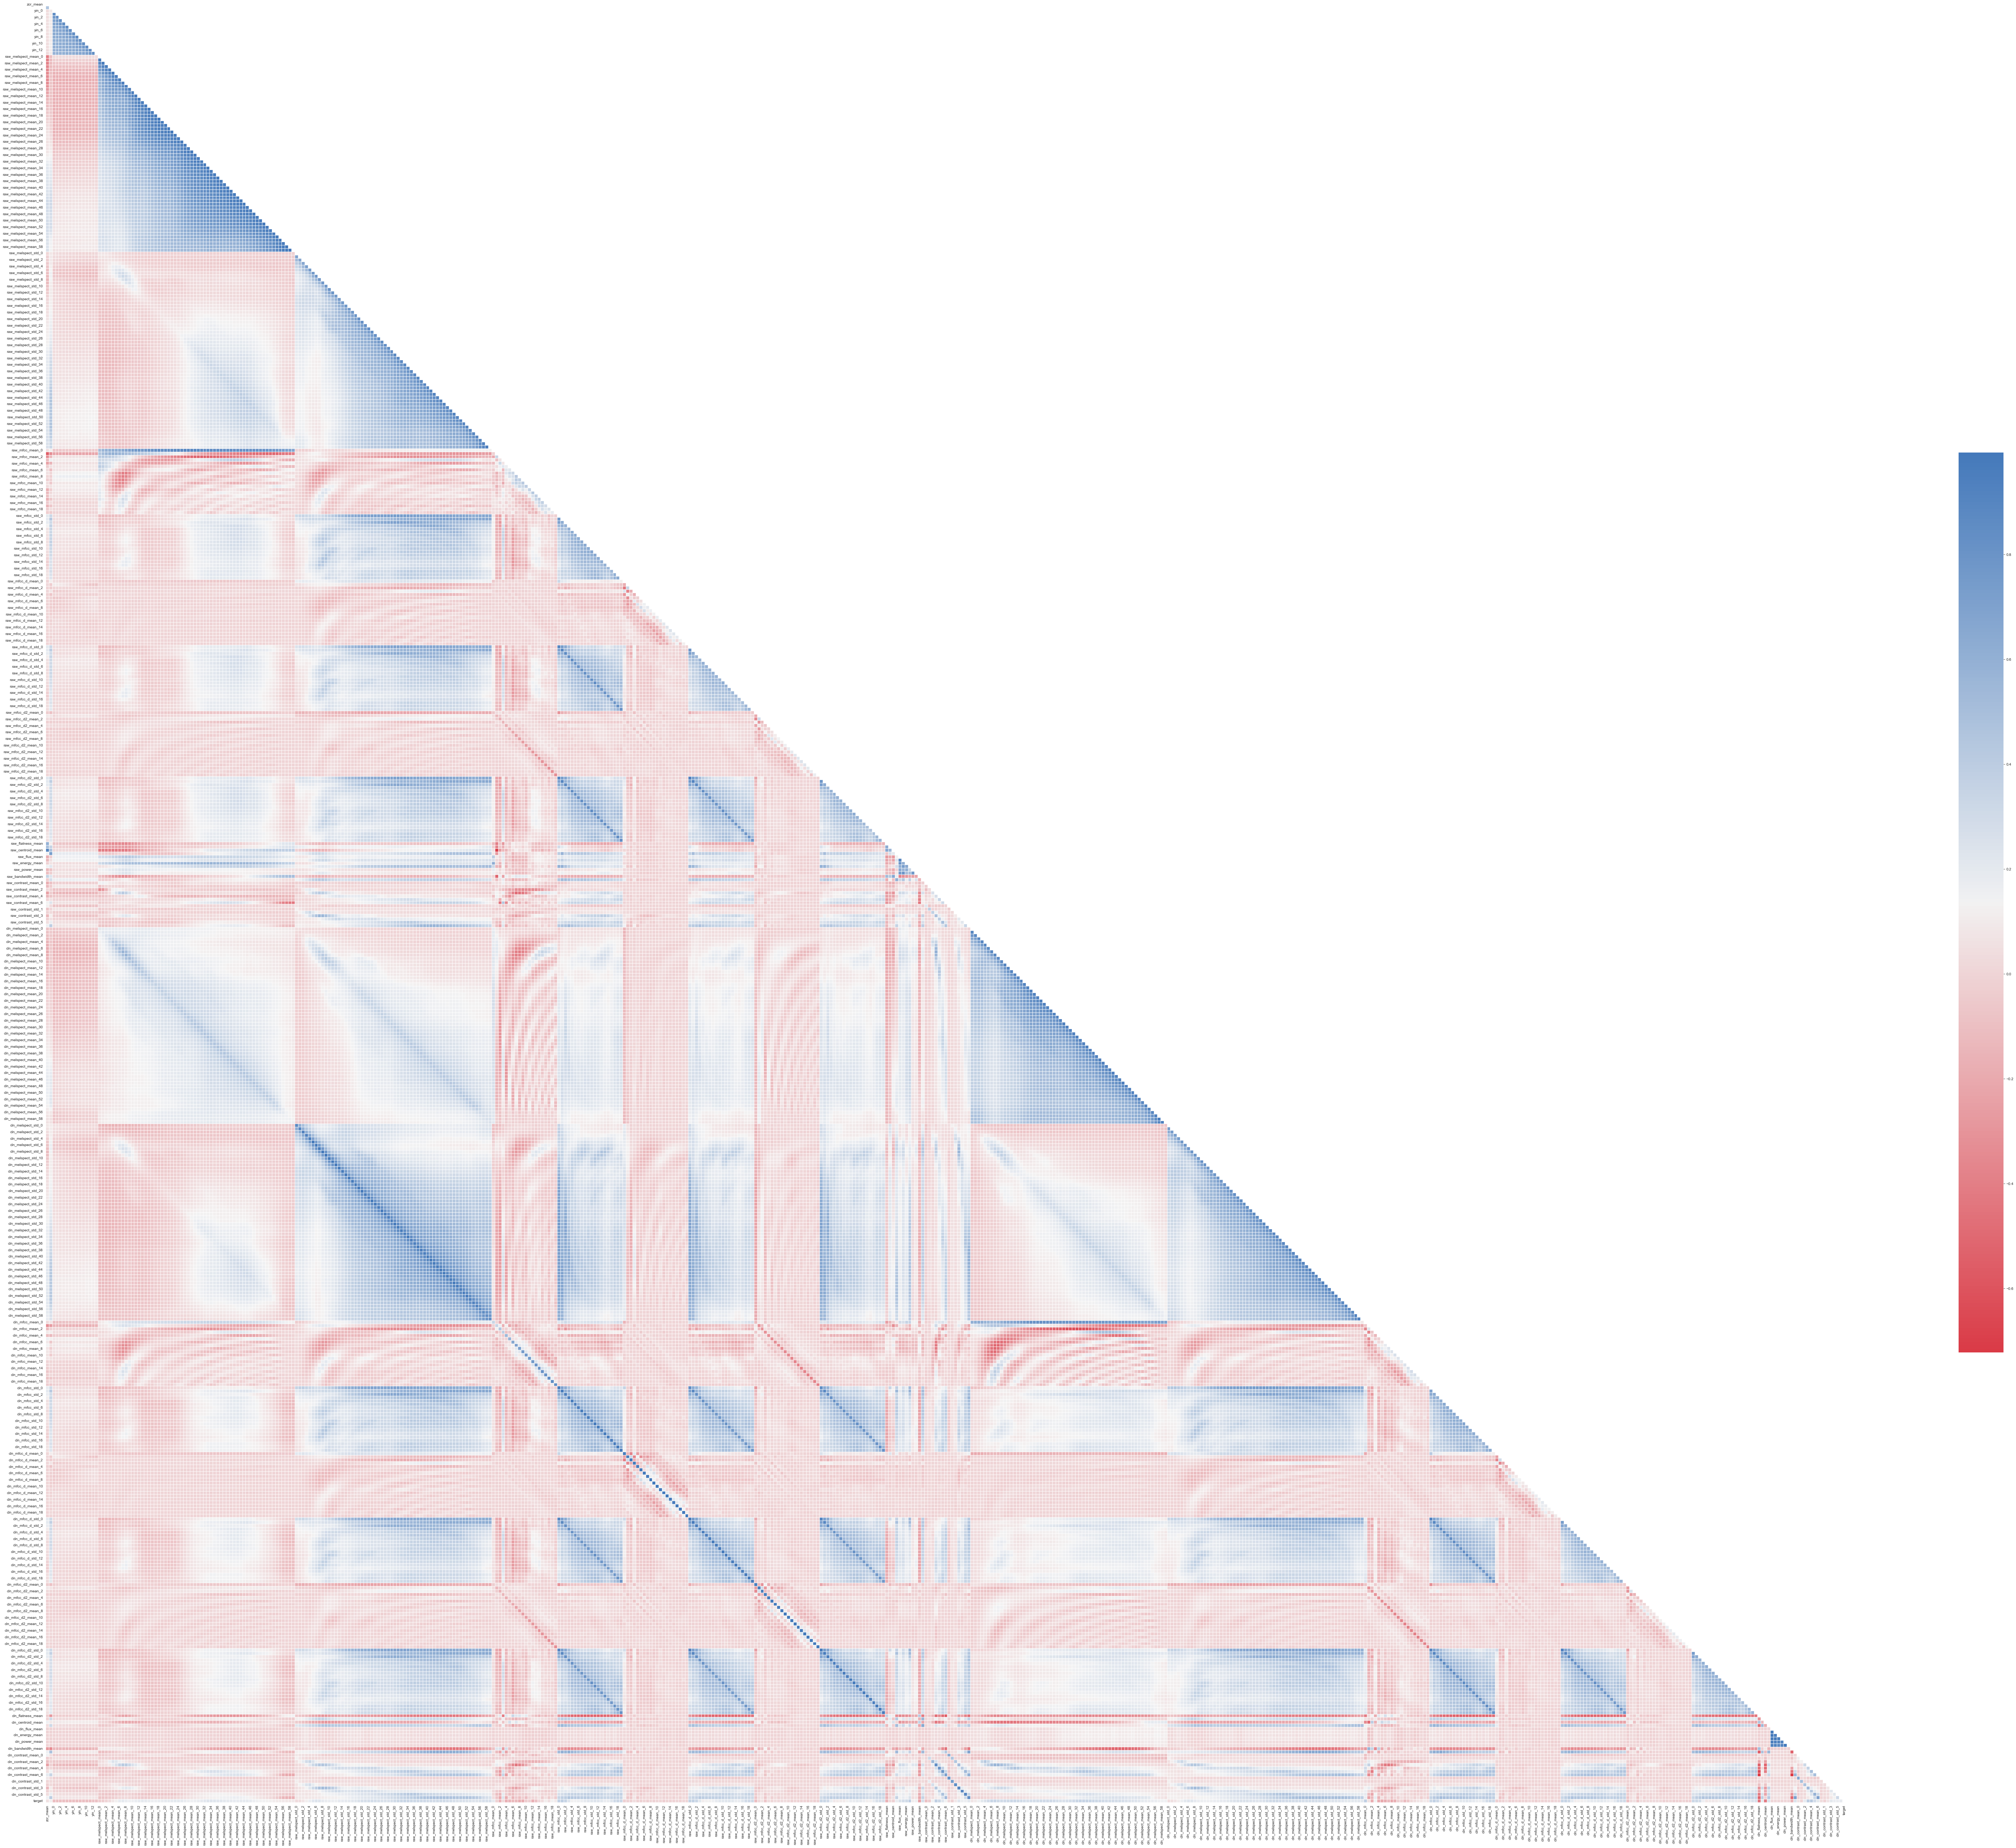

In [19]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.uint))
sns.set_style(style = 'white')
fg, ax = plt.subplots(figsize=(110, 90))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True,
           linewidths=.5, cbar_kws={'shrink':.5}, ax=ax)

In [20]:
corr[abs(corr["target"]) > 0.35]

,zcr_mean,zcr_std,yin_0,yin_1,yin_2,yin_3,yin_4,yin_5,yin_6,yin_7,...,cln_contrast_mean_5,cln_contrast_mean_6,cln_contrast_std_0,cln_contrast_std_1,cln_contrast_std_2,cln_contrast_std_3,cln_contrast_std_4,cln_contrast_std_5,cln_contrast_std_6,target
raw_mfcc_std_0,0.199210,0.325631,0.047393,0.042464,0.032709,0.032088,0.031141,0.029594,0.027105,0.023925,...,0.199103,0.242660,0.030136,0.035348,0.053106,0.128166,0.207703,0.262758,0.338010,0.361719
raw_mfcc_std_1,0.193544,0.432790,0.047054,0.048330,0.044329,0.047012,0.048435,0.050078,0.049239,0.048587,...,0.238085,0.317315,0.022355,0.023029,0.076545,0.196376,0.204399,0.279916,0.382630,0.378521
raw_mfcc_d_std_0,0.208385,0.317467,0.037198,0.034925,0.029599,0.031199,0.033522,0.034731,0.033912,0.032949,...,0.187356,0.234184,0.025700,0.030551,0.043219,0.114121,0.190595,0.245339,0.313946,0.354854
raw_mfcc_d_std_1,0.190292,0.389146,0.035210,0.037347,0.036437,0.040954,0.044409,0.047717,0.048489,0.049416,...,0.213581,0.294668,0.018167,0.018630,0.062448,0.162357,0.175933,0.255089,0.348909,0.359930
raw_energy_std,0.143208,0.213131,0.057149,0.062026,0.061890,0.063582,0.065398,0.067663,0.069360,0.070189,...,0.191412,0.227591,0.025128,0.009323,0.042941,0.152758,0.148488,0.184159,0.245696,0.382051
raw_contrast_mean_3,-0.242581,-0.039756,-0.131461,-0.137153,-0.141205,-0.144731,-0.147270,-0.149757,-0.152034,-0.151036,...,0.174789,0.147769,-0.013024,-0.003814,0.118540,0.437100,0.140391,0.114138,0.098585,0.370735
cln_mfcc_mean_0,0.032492,0.071929,-0.095906,-0.089520,-0.085507,-0.081875,-0.078620,-0.073527,-0.071211,-0.068196,...,0.308084,0.253498,0.007405,-0.000953,0.053814,0.141238,0.158075,0.183562,0.172229,0.373368
cln_mfcc_std_1,0.193907,0.414695,0.038014,0.040616,0.037955,0.040556,0.042367,0.044531,0.043793,0.042722,...,0.256207,0.361585,0.024368,0.020317,0.076339,0.191327,0.209627,0.295450,0.423811,0.365380
cln_flatness_mean,-0.034747,-0.283667,-0.031853,-0.034045,-0.032054,-0.032928,-0.032470,-0.031725,-0.030256,-0.028514,...,-0.631004,-0.717656,0.032837,-0.016279,-0.089820,-0.281157,-0.217295,-0.406864,-0.521087,-0.430933
cln_centroid_mean,0.155353,0.089627,0.085164,0.089059,0.093531,0.097494,0.100242,0.103817,0.105816,0.105707,...,-0.406445,-0.011442,0.011374,-0.004483,-0.083712,-0.262062,-0.190687,-0.220278,-0.019020,-0.409291
